In [1]:
using Pkg; Pkg.activate(".")

  Activating project at `~/Documents/Julia/Julia_ML_training/unit3`


In [2]:
using LinearAlgebra # in-built
using Random # in-built
using Statistics # in-built
using Plots
using DataFrames
using CSV

[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a] (cache misses: wrong dep version loaded (4))


In [3]:
k, b, M = 1.2, 0.3, 2.0 # some constants
A = [0 1;
    -k/M -b/M]

2×2 Matrix{Float64}:
  0.0   1.0
 -0.6  -0.15

In [40]:
init_x = [8., 0.0] # initial condition
t_end = 50.0
t_range = 0:0.1:t_end

manual_sol = [exp(A*t)*init_x for t in t_range]

501-element Vector{Vector{Float64}}:
 [8.0, 0.0]
 [7.976131477231489, -0.4759416594600485]
 [7.9051424045917065, -0.9419645483609713]
 [7.788156860178615, -1.3954424545440751]
 [7.626555969115729, -1.8338629358935703]
 [7.421965855822404, -2.2548405811977332]
 [7.1762443173550725, -2.6561293174622302]
 [6.891466316183785, -3.035633704615905]
 [6.569908396330972, -3.391419165455919]
 [6.214032131660425, -3.721721105793306]
 [5.826466719245836, -4.024952887036327]
 [5.409990834155511, -4.299712620841834]
 [4.967513864654207, -4.5447887629283095]
 ⋮
 [0.20433569345505226, -0.00011053120571433343]
 [0.2037150848932897, -0.012265041107208264]
 [0.20189115345513367, -0.02416558937517778]
 [0.19889267077495587, -0.03574512200121027]
 [0.19475497135258296, -0.04693949404546087]
 [0.1895196445252878, -0.05768780813280151]
 [0.18323419379537167, -0.06793272857910464]
 [0.17595166602713536, -0.07762076964073986]
 [0.16773025316892345, -0.08670255655678863]
 [0.15863286927994397, -0.09513305823526

In [7]:
 t = t_range

0.0:0.1:50.0

In [17]:
#Pkg.add("DifferentialEquations")
using DifferentialEquations 

In [19]:
(0,6)

(0, 6)

In [41]:
linear_RHS(x, Amat, t) = Amat*x
prob = ODEProblem(linear_RHS, init_x, (0,t_end), A)
sol = solve(prob)

retcode: Success
Interpolation: 3rd order Hermite
t: 58-element Vector{Float64}:
  0.0
  0.00020830729492146818
  0.00229138024413615
  0.023122109736282967
  0.1335966096654432
  0.36577241373307684
  0.6995799181070914
  1.127561697405902
  1.6594365833770348
  2.2581447011496483
  2.877735404642017
  3.603637495663638
  4.3990683904858745
  ⋮
 39.03871867840823
 40.09408776985609
 41.18119584727173
 42.19249397072834
 43.31781573881729
 44.3258472053866
 45.440901129815444
 46.41599112001244
 47.56207282437716
 48.524470046796786
 49.655495306375656
 50.0
u: 58-element Vector{Vector{Float64}}:
 [8.0, 0.0]
 [7.999999895860455, -0.00099985939035268]
 [7.999987400430654, -0.010996729462204742]
 [7.998718399683977, -0.11078795825017768]
 [7.957487282908296, -0.6337486075041383]
 [7.686793838246466, -1.6856482354542235]
 [6.892741024708577, -3.034087776569335]
 [5.29050490801111, -4.370269514081535]
 [2.6878641968695915, -5.265604384991076]
 [-0.4959942528006591, -5.180142176377766]
 [-3

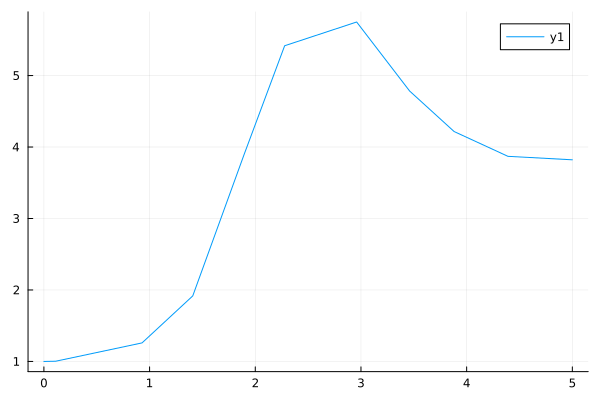

In [38]:

linear_RHS(y, p, t) = y*sin(t) - t*cos(y) # Note: you NEED p for this function to work!
init_y = 1
prob = ODEProblem(linear_RHS, init_y, (0,5))
sol = solve(prob)
plot(sol.t, sol.u, legend=:topright)

In [34]:
sol

retcode: Success
Interpolation: 3rd order Hermite
t: 14-element Vector{Float64}:
 0.0
 9.999999999999999e-5
 0.0010999999999999998
 0.011099999999999997
 0.11109999999999996
 0.9286227561632598
 1.4084868438895704
 1.8971610681970723
 2.277992772861799
 2.959182881228574
 3.4605426173224014
 3.88168033721544
 4.390784274991374
 5.0
u: 14-element Vector{Float64}:
 1.0
 1.0000000022984885
 1.0000002781171988
 1.0000283206502958
 1.0028468781242441
 1.259365073229342
 1.9169346158559242
 3.9069011597520764
 5.417083247478966
 5.749274332545968
 4.783240410864527
 4.216087733686851
 3.869673477157774
 3.8210379446042753

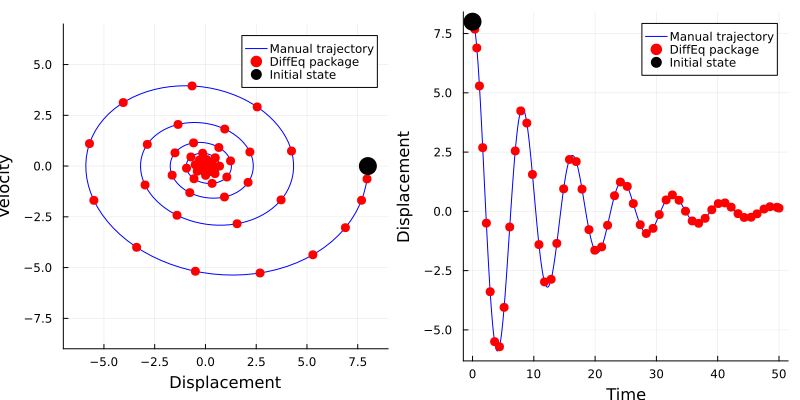

In [42]:
p1 = plot(first.(manual_sol), last.(manual_sol),
    c=:blue, label="Manual trajectory")
p1 = scatter!(first.(sol.u), last.(sol.u),
    c=:red, ms = 5, msw=0, label="DiffEq package")
p1 = scatter!([init_x[1]], [init_x[2]],
    c=:black, ms=10, label="Initial state", xlims=(-7,9), ylims=(-9,7),
    ratio=:equal, xlabel="Displacement", ylabel="Velocity")
p2 = plot(t_range, first.(manual_sol),
    c=:blue, label="Manual trajectory")
p2 = scatter!(sol.t, first.(sol.u),
    c=:red, ms = 5, msw=0, label="DiffEq package")
p2 = scatter!([0], [init_x[1]],
    c=:black, ms=10, label="Initial state", xlabel="Time",
    ylabel="Displacement")
plot(p1, p2, size=(800,400), legend=:topright)

R0 = 2.5
Final infected proportion= 0.8622039418944475


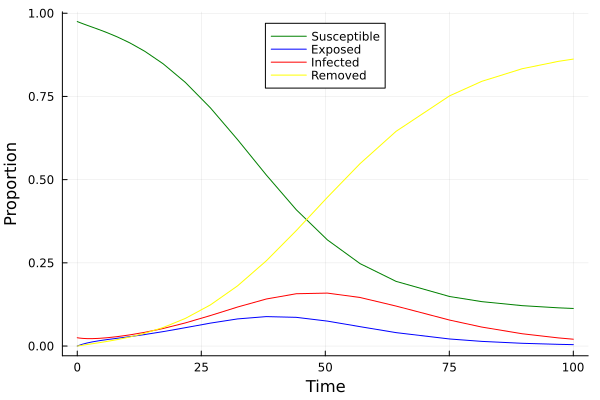

In [43]:
β, δu, γ = 0.25, 0.2, 0.1
initialInfect = 0.025
println("R0 = ", β/γ)

init_x = [1-initialInfect, 0.0, initialInfect, 0.0]
tEnd = 100.0

RHS(x,parms,t) = [  -β*x[1]*x[3],
                    β*x[1]*x[3] - δu*x[2],
                    δu*x[2] - γ*x[3],
                    γ*x[3] ]

prob = ODEProblem(RHS, init_x, (0,tEnd), 0)
sol = solve(prob)
println("Final infected proportion= ", sol.u[end][4])

plot(sol.t,((x)->x[1]).(sol.u),label = "Susceptible", c=:green)
plot!(sol.t,((x)->x[2]).(sol.u),label = "Exposed", c=:blue)
plot!(sol.t,((x)->x[3]).(sol.u),label = "Infected", c=:red)
plot!(sol.t,((x)->x[4]).(sol.u),label = "Removed", c=:yellow,
    xlabel = "Time", ylabel = "Proportion",legend = :top)

In [44]:
using Distributions

function simulateSIRDoobGillespie(β ,δu, γ, I0, M, T)
    t, S, E, I, R = 0.0, M-I0, 0, I0, 0
    tValues, sValues, eValues, iValues, rValues = [0.0], [S], [E], [I], [R]
    while t<T
        infectionRate = β*I*S
        symptomRate = δu*E
        removalRate = γ*I
        totalRate = infectionRate + symptomRate + removalRate
        probs = [infectionRate, symptomRate, removalRate]/totalRate
        t += rand(Exponential(1/totalRate))
        u = rand()
        if u < probs[1]
            S -= 1; E += 1
        elseif u < probs[1] + probs[2]
            E -=1; I += 1
        else
            I -= 1; R += 1
        end
        push!(tValues, t)
        push!(sValues, S); push!(eValues, E); push!(iValues, I); push!(rValues, R)
        I == 0 && break
    end
    return [tValues, sValues, eValues, iValues, rValues]
end

simulateSIRDoobGillespie (generic function with 1 method)

In [45]:
Random.seed!(0)

β, δu, γ = 0.25, 0.4, 0.1
initialInfect = 0.025
M = 1000
I0 = floor(Int, initialInfect*M)
N = 30

tV,sV,eV,iV,rV = simulateSIRDoobGillespie(β/M,δu,γ,I0,M,Inf)
lastT = tV[end]

finals = [simulateSIRDoobGillespie(β/M,δu,γ,I0,M,Inf)[5][end] for _ in 1:N]/M;

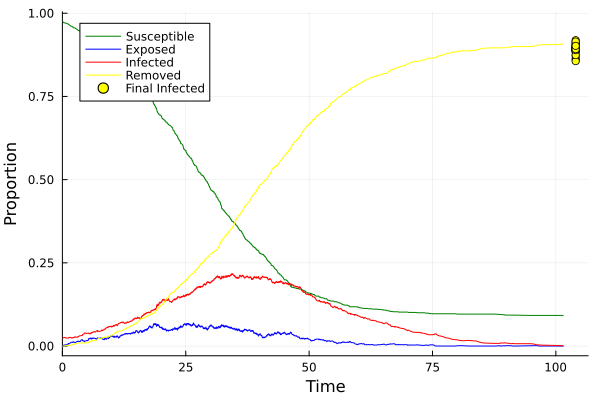

In [46]:
p1 = plot(tV,sV/M,label = "Susceptible", c=:green)
plot!(tV,eV/M,label = "Exposed", c=:blue)
plot!(tV,iV/M,label = "Infected",c=:red)
plot!(tV,rV/M,label = "Removed", c=:yellow,
    xlabel = "Time", ylabel = "Proportion",
    legend = :topleft, xlim = (0,lastT*1.05))
scatter!(lastT*1.025*ones(N),finals, c = :yellow,label= "Final Infected")

In [47]:
A = [1 2 3; 
     4 1 6; 
     7 8 1]

@show det(A)
@show tr(A)
@show eigvals(A)

factorize(A)

det(A) = 104.0
tr(A) = 3
eigvals(A) = [-6.214612641961068, -1.554026596484783, 10.768639238445848]


LU{Float64, Matrix{Float64}, Vector{Int64}}
L factor:
3×3 Matrix{Float64}:
 1.0        0.0   0.0
 0.571429   1.0   0.0
 0.142857  -0.24  1.0
U factor:
3×3 Matrix{Float64}:
 7.0   8.0      1.0
 0.0  -3.57143  5.42857
 0.0   0.0      4.16

In [48]:
A + 100I

3×3 Matrix{Int64}:
 101    2    3
   4  101    6
   7    8  101

In [49]:
a = collect(1:4)

4-element Vector{Int64}:
 1
 2
 3
 4

In [50]:
A = reshape(a, 2, 2)

2×2 Matrix{Int64}:
 1  3
 2  4

In [51]:
data = "../data/L1L2data.csv" |> CSV.File |> DataFrame

Row,X,Y
,Float64,Float64
1,2.9,3.0
2,4.3,2.9
3,5.2,5.3
4,6.9,7.8
5,8.3,5.5


In [52]:
using GLM

modelK = glm(@formula(Y ~ X), data, Normal())
b0K, b1K = coef(modelK)

2-element Vector{Float64}:
 0.9449358690844764
 0.7164971251658557

In [53]:
xVals, yVals = data[:,1], data[:,2]
n = length(xVals)
A = [ones(n) xVals]

# Approach A
xBar, yBar = mean(xVals),mean(yVals)
sXX, sXY = ones(n)'*(xVals.-xBar).^2 , dot(xVals.-xBar,yVals.-yBar)
b1A = sXY/sXX
b0A = yBar - b1A*xBar

# Approach B
b1B = cor(xVals,yVals)*(std(yVals)/std(xVals))
b0B = yBar - b1B*xBar

# Approach C
b0C, b1C = A'A \ A'yVals

# Approach D
Adag = inv(A'*A)*A'
b0D, b1D = Adag*yVals

# Approach E
b0E, b1E = pinv(A)*yVals

# Approach F
b0F, b1F = A\yVals

# Approach G
F = qr(A)
Q, R = F.Q, F.R
b0G, b1G = (inv(R)*Q')*yVals

# Approach H
F = svd(A)
V, Sp, Us = F.V, Diagonal(1 ./ F.S), F.U'
b0H, b1H = (V*Sp*Us)*yVals

# Approach I
η, eps = 0.002, 10^-6.
b, bPrev = [0,0], [1,1]
while norm(bPrev-b) >= eps
    global bPrev = b
    global b = b - η*2*A'*(A*b - yVals)
end
b0I, b1I = b[1], b[2]

# Approach J
modelJ = lm(@formula(Y ~ X), data)
b0J, b1J = coef(modelJ);

In [54]:
println(round.([b0A,b0B,b0C,b0D,b0E,b0F,b0G,b0H,b0I,b0J,b0K], digits=3))
println(round.([b1A,b1B,b1C,b1D,b1E,b1F,b1G,b1H,b1I,b1J,b1K], digits=3))

[0.945, 0.945, 0.945, 0.945, 0.945, 0.945, 0.945, 0.945, 0.944, 0.945, 0.945]
[0.716, 0.716, 0.716, 0.716, 0.716, 0.716, 0.716, 0.716, 0.717, 0.716, 0.716]


Standard deviation with no CRN: 0.03552978983847171
Standard deviation with CRN and single RNG: 0.03366721523056789
Standard deviation with CRN and two RNGs: 0.014375822211764614


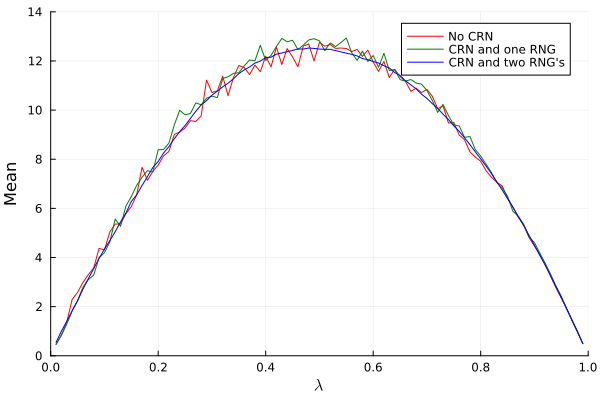

In [55]:
using LaTeXStrings

N, K, M = 10^2, 50, 10^3
lamRange = 0.01:0.01:0.99

prn(lambda,rng) = quantile(Poisson(lambda),rand(rng))
zDist(lam) = Uniform(0,2*(1-lam))

rv(lam,rng) = sum([rand(rng,zDist(lam)) for _ in 1:prn(K*lam,rng)])
rv2(lam,rng1,rng2) = sum([rand(rng1,zDist(lam)) for _ in 1:prn(K*lam,rng2)])

mEst(lam,rng) = mean([rv(lam,rng) for _ in 1:N])
mEst2(lam,rng1,rng2) = mean([rv2(lam,rng1,rng2) for _ in 1:N])

function mGraph0(seed)
    singleRng = MersenneTwister(seed)
    [mEst(lam,singleRng) for lam in lamRange]
end
mGraph1(seed) = [mEst(lam,MersenneTwister(seed)) for lam in lamRange]
mGraph2(seed1,seed2) = [mEst2(lam,MersenneTwister(seed1),
        MersenneTwister(seed2)) for lam in lamRange]

argMaxLam(graph) = lamRange[findmax(graph)[2]]

std0 = std([argMaxLam(mGraph0(seed)) for seed in 1:M])
std1 = std([argMaxLam(mGraph1(seed)) for seed in 1:M])
std2 = std([argMaxLam(mGraph2(seed,seed+M)) for seed in 1:M])

println("Standard deviation with no CRN: ", std0)
println("Standard deviation with CRN and single RNG: ", std1)
println("Standard deviation with CRN and two RNGs: ", std2)

plot(lamRange,mGraph0(1987),
    c=:red, label="No CRN")
plot!(lamRange,mGraph1(1987),
    c=:green, label="CRN and one RNG")
plot!(lamRange,mGraph2(1987,1988),
    c=:blue, label="CRN and two RNG's", xlims=(0,1),ylims=(0,14),
    xlabel=L"\lambda", ylabel = "Mean")